<a href="https://colab.research.google.com/github/SaswatoB/Data-Science-Engineering-Methods/blob/main/Rice_grain_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rice grain Classification using Auto-ML
The aim of this model is to classify the type of rice grain using several parameters. 
Here we use Auto ML model for the predictions while also trying to predict the same using gradient boosting classifier.

In [1]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

!pip uninstall h2o


!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 176.0 MB 6.4 kB/s 
  Created wheel for h2o: filename=h2o-3.36.0.2-py2.py3-none-any.whl size=176112127 sha256=6447cd90f08905301104f346eda4611a7f0d4c86a2b77be5f377b0cb333e1c51
  Stored in directory: /root/.cache/pip/wheels/0b/83/bd/343a6140119b4098103e725e1cfe9f198568d13cf103acbc7c
Successfully built h2o


**Importing required libraries**

In [2]:
# Import libraries
# Use pip install or conda install if missing a library
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a minimum memory size and a run time in seconds


In [3]:
min_mem_size=6 
run_time=222

# Use 50% of availible resources


In [4]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


65535 Highest port no
Start the H2O server on a random port
H2o is the base package of Auto-ML

In [5]:
port_no=random.randint(5555,55555)



In [6]:
#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:24121 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp7yjxmfc5
  JVM stdout: /tmp/tmp7yjxmfc5/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp7yjxmfc5/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:24121
Connecting to H2O server at http://127.0.0.1:24121 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_bu840q
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


# Import Rice grain data set

Data picked from the following link:
https://www.kaggle.com/mssmartypants/rice-type-classification

In [7]:
from google.colab import files
uploaded = files.upload()


Saving riceClassification.csv to riceClassification.csv


# Reading data in pandas and H2O dataframe

In [8]:
import io

df1 = pd.read_csv(io.StringIO(uploaded['riceClassification.csv'].decode('utf-8')))
df = h2o.H2OFrame(df1)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [9]:
df.head()

id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
1,4537,92.2293,64.0128,0.719916,4677,76.0045,0.657536,273.085,0.76451,1.4408,1
2,2872,74.6919,51.4005,0.725553,3015,60.471,0.713009,208.317,0.831658,1.45314,1
3,3048,76.2932,52.0435,0.731211,3132,62.2963,0.759153,210.012,0.868434,1.46595,1
4,3073,77.0336,51.9285,0.738639,3157,62.5513,0.783529,210.657,0.870203,1.48346,1
5,3693,85.1248,56.374,0.749282,3802,68.5717,0.769375,230.332,0.874743,1.51,1
6,2990,77.4171,50.9543,0.752861,3080,61.7008,0.584898,216.93,0.798439,1.51934,1
7,3556,84.3236,55.4131,0.753762,3636,67.2877,0.750211,227.007,0.867148,1.52173,1
8,3788,86.9524,56.4448,0.760664,3866,69.448,0.800676,235.476,0.858473,1.54049,1
9,2629,74.1331,48.0741,0.761228,2790,57.8563,0.640595,207.325,0.768594,1.54206,1
10,5719,106.721,68.9777,0.763053,5819,85.3326,0.754983,281.839,0.904748,1.54718,1


Dropping ID column

In [10]:
df1= df1.drop('id', axis = 1)
df= df.drop('id', axis = 1)
df.head()

Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
4537,92.2293,64.0128,0.719916,4677,76.0045,0.657536,273.085,0.76451,1.4408,1
2872,74.6919,51.4005,0.725553,3015,60.471,0.713009,208.317,0.831658,1.45314,1
3048,76.2932,52.0435,0.731211,3132,62.2963,0.759153,210.012,0.868434,1.46595,1
3073,77.0336,51.9285,0.738639,3157,62.5513,0.783529,210.657,0.870203,1.48346,1
3693,85.1248,56.374,0.749282,3802,68.5717,0.769375,230.332,0.874743,1.51,1
2990,77.4171,50.9543,0.752861,3080,61.7008,0.584898,216.93,0.798439,1.51934,1
3556,84.3236,55.4131,0.753762,3636,67.2877,0.750211,227.007,0.867148,1.52173,1
3788,86.9524,56.4448,0.760664,3866,69.448,0.800676,235.476,0.858473,1.54049,1
2629,74.1331,48.0741,0.761228,2790,57.8563,0.640595,207.325,0.768594,1.54206,1
5719,106.721,68.9777,0.763053,5819,85.3326,0.754983,281.839,0.904748,1.54718,1


# Initial data inspection

In [11]:
df.types

{'Area': 'int',
 'AspectRation': 'real',
 'Class': 'int',
 'ConvexArea': 'int',
 'Eccentricity': 'real',
 'EquivDiameter': 'real',
 'Extent': 'real',
 'MajorAxisLength': 'real',
 'MinorAxisLength': 'real',
 'Perimeter': 'real',
 'Roundness': 'real'}

In [12]:
print('Total Number of rows:', df.shape[0] )
print('Total Number of columns:', df.shape[1] )

Total Number of rows: 18185
Total Number of columns: 11


In [13]:
df.describe()

Rows:18185
Cols:11




,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
type,int,real,real,real,int,real,real,real,real,real,int
mins,2522.0,74.13311404,34.40989421,0.6766470565,2579.0,56.66665803,0.3832391714,197.015,0.1745901779,1.358128195,0.0
mean,7036.492988726975,151.68075388107974,59.8078511594407,0.9154063539308258,7225.8178718724475,94.13295239997858,0.6166528250536815,351.60694924387997,0.7079983422321539,2.599081089354609,0.5490789111905416
maxs,10210.0,183.2114344,82.55076212,0.9667736672,11008.0,114.0165591,0.8865730584,508.511,0.9047483132,3.911844673,1.0
sigma,1467.1971501530709,12.37640247521008,10.061652559363003,0.030575132488674692,1502.0065711989255,9.906250469738056,0.10438942430267777,29.500619875939645,0.06731016002659125,0.4348364637403783,0.497599112099058
zeros,0,0,0,0,0,0,0,0,0,0,8200
missing,0,0,0,0,0,0,0,0,0,0,0
0,4537.0,92.2293165,64.01276874,0.7199162256,4677.0,76.00452496,0.6575362319,273.085,0.7645096145,1.440795615,1.0
1,2872.0,74.69188071,51.40045446,0.7255527468,3015.0,60.47101762,0.7130089374,208.317,0.8316582009,1.453136582,1.0
2,3048.0,76.2931638,52.04349114,0.7312109273,3132.0,62.29634124,0.7591531756,210.012,0.8684335737,1.465950153,1.0


Splitting independent variables and target variables

In [14]:
import statsmodels.api as sm

X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

X.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000


# Checking for Multicollinearity

If there is multicollinearity present between two independent variables i.e. if two parameters are highly correlated say above 90% , it is possible to drop one of those parameters as both of them are very similar.

Multicollinearity can be found by plotting a heatmap of the correlation of all the parameters.

Here we will also be using **Variance Inflation Factor**  or **VIF**.
It is calculated by the inverse of **(1 - R^2)**.  
The higher the R^2 the higher the VIF and multicollinearity.

The disadvantage to this is that our model might lose some kind of information.

Detecting and rectifying multicollinearity can be better understood in the following article:
https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

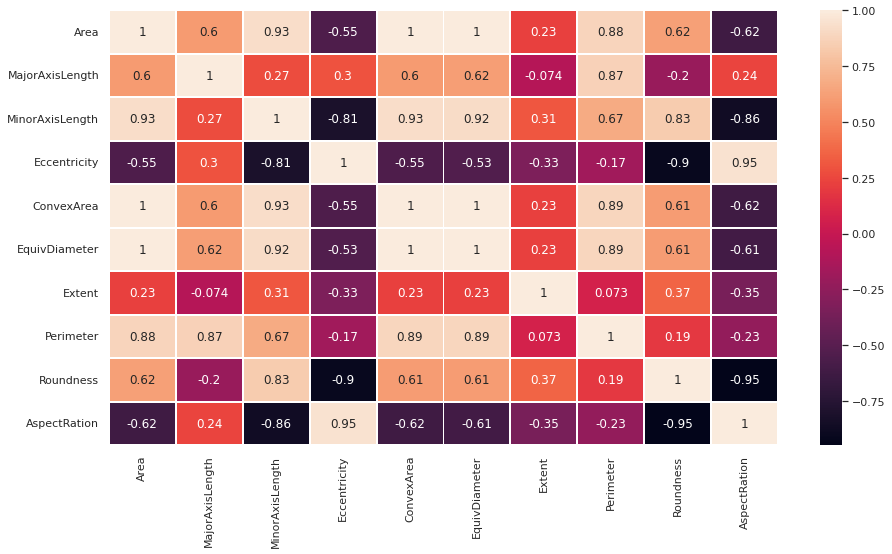

In [15]:
#Initial Heatmap
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(X.corr(), linewidths=1, annot = True)

The above plot shows that multicollinearity is present. We will further confirm this using VIF below.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

The above function will now be used to calculate the VIF of the hyperparameters.

In [17]:

X = df1.iloc[:,:-1]
calc_vif(X).sort_values(by = 'VIF', ascending=False)


,variables,VIF
5,EquivDiameter,200374.161541
0,Area,55974.250088
1,MajorAxisLength,48064.134542
4,ConvexArea,43762.833933
2,MinorAxisLength,30871.549461
7,Perimeter,26668.994678
3,Eccentricity,14799.718257
8,Roundness,8747.344897
9,AspectRation,3481.452873
6,Extent,41.550619


Sequentially removing the variable with the highest VIF value. This also alters the VIF value for rest of the parameters.

In [18]:
X = X.drop('EquivDiameter',axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending=False)

,variables,VIF
4,ConvexArea,39012.960289
0,Area,38076.227025
6,Perimeter,25878.829460
1,MajorAxisLength,17391.601633
2,MinorAxisLength,14889.276930
3,Eccentricity,9682.081349
7,Roundness,8439.243594
8,AspectRation,2248.536015
5,Extent,41.538436


In [19]:
X = X.drop('ConvexArea',axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending=False)

,variables,VIF
5,Perimeter,25853.940945
1,MajorAxisLength,17350.099272
2,MinorAxisLength,13795.383639
3,Eccentricity,8808.972116
6,Roundness,7161.376136
0,Area,3470.522790
7,AspectRation,2232.048952
4,Extent,41.526091


Checking for multicollinearity using heatmap.

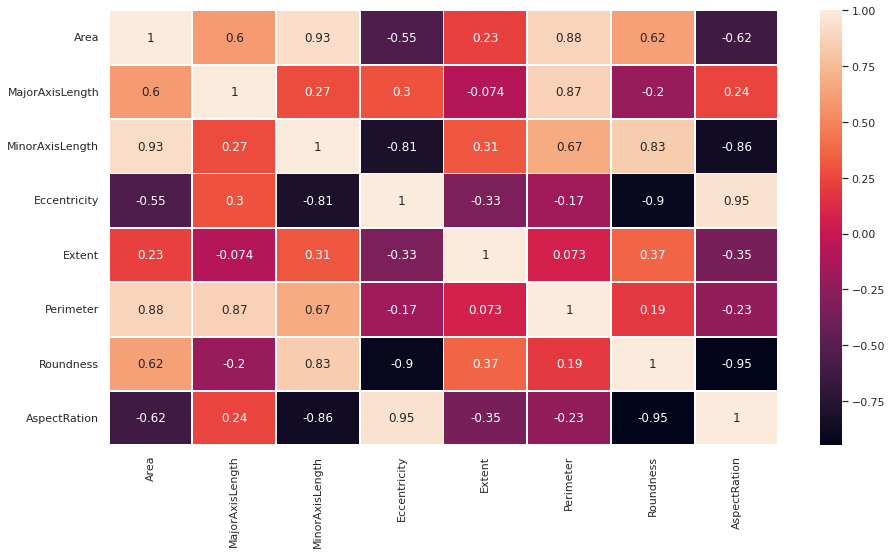

In [20]:
sns.heatmap(X.corr(), linewidths=1,annot=True)

In [21]:
X = X.drop('Perimeter',axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending=False)

,variables,VIF
1,MajorAxisLength,8433.104359
3,Eccentricity,4140.574175
0,Area,3034.265972
2,MinorAxisLength,2524.728084
6,AspectRation,2146.244565
5,Roundness,1105.281603
4,Extent,41.491321


In [22]:
X = X.drop('MajorAxisLength',axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending=False)

,variables,VIF
2,Eccentricity,3474.789067
1,MinorAxisLength,2485.240821
4,Roundness,1042.034861
5,AspectRation,1039.737426
0,Area,721.529624
3,Extent,41.490184


In [23]:
X = X.drop('Eccentricity',axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending=False)

,variables,VIF
1,MinorAxisLength,2013.072678
3,Roundness,775.212038
0,Area,614.600436
4,AspectRation,47.059175
2,Extent,41.419426


In [24]:
X = X.drop('MinorAxisLength',axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending=False)

,variables,VIF
2,Roundness,96.306182
1,Extent,41.365955
0,Area,39.468977
3,AspectRation,16.927149


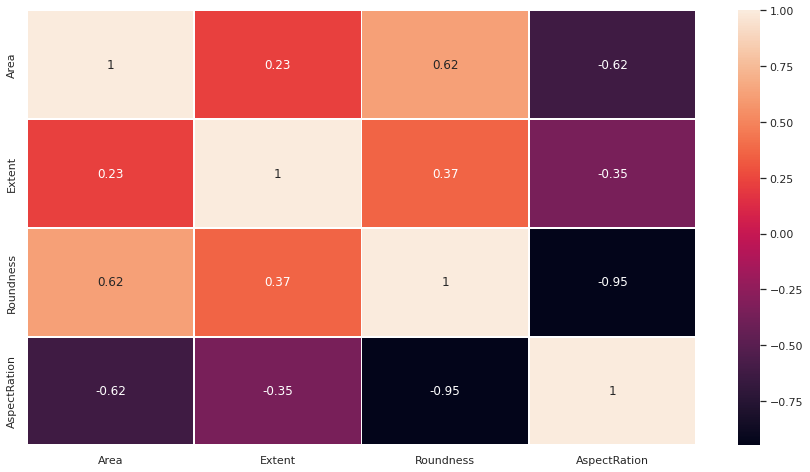

In [25]:
sns.heatmap(X.corr(),linewidths=1,annot = True)

The above plot shows most of the multicollinearity is removed.
So now, we will make changes in the H2O dataframe accordingly.

In [26]:
df1 = df1[['Area','Extent','Roundness','AspectRation','Class']]
df = df[['Area','Extent','Roundness','AspectRation','Class']]
df.head()

Area,Extent,Roundness,AspectRation,Class
4537,0.657536,0.76451,1.4408,1
2872,0.713009,0.831658,1.45314,1
3048,0.759153,0.868434,1.46595,1
3073,0.783529,0.870203,1.48346,1
3693,0.769375,0.874743,1.51,1
2990,0.584898,0.798439,1.51934,1
3556,0.750211,0.867148,1.52173,1
3788,0.800676,0.858473,1.54049,1
2629,0.640595,0.768594,1.54206,1
5719,0.754983,0.904748,1.54718,1


Splitting the data into test and train set.

In [27]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [28]:
df_train.head()

Area,Extent,Roundness,AspectRation,Class
4537,0.657536,0.76451,1.4408,1
2872,0.713009,0.831658,1.45314,1
3048,0.759153,0.868434,1.46595,1
3073,0.783529,0.870203,1.48346,1
3693,0.769375,0.874743,1.51,1
2990,0.584898,0.798439,1.51934,1
3556,0.750211,0.867148,1.52173,1
3788,0.800676,0.858473,1.54049,1
2629,0.640595,0.768594,1.54206,1
5719,0.754983,0.904748,1.54718,1


In [29]:
#Setting predictor and Target variables
X= df.columns
y= 'Class'
X.remove(y)
X

['Area', 'Extent', 'Roundness', 'AspectRation']

# Setting up the model
AutoML will automatically predict whether to perform classification or regression based on the target parameter's data type

In [30]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [31]:
aml.train(x=X,y=y,training_frame=df_train)  

AutoML progress: |
03:21:02.834: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.

████
03:21:15.911: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.

█
03:21:18.919: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.

██████
03:21:38.936: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical b

In [32]:
print(aml.leaderboard)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_3_AutoML_1_20220214_32102,0.00796165,0.0892281,0.00796165,0.0184354,0.0624916
StackedEnsemble_BestOfFamily_4_AutoML_1_20220214_32102,0.00801573,0.0895306,0.00801573,0.018846,0.0627434
GBM_grid_1_AutoML_1_20220214_32102_model_2,0.00805605,0.0897555,0.00805605,0.0188365,0.0629013
StackedEnsemble_AllModels_2_AutoML_1_20220214_32102,0.00807238,0.0898464,0.00807238,0.0188977,0.0628982
StackedEnsemble_AllModels_1_AutoML_1_20220214_32102,0.00807335,0.0898518,0.00807335,0.0189583,0.0629116
StackedEnsemble_BestOfFamily_3_AutoML_1_20220214_32102,0.00809076,0.0899486,0.00809076,0.0190525,0.0629789
StackedEnsemble_BestOfFamily_2_AutoML_1_20220214_32102,0.00809309,0.0899616,0.00809309,0.0190712,0.0629842
GBM_2_AutoML_1_20220214_32102,0.00814762,0.0902642,0.00814762,0.0199509,0.0631876
GBM_3_AutoML_1_20220214_32102,0.00824813,0.0908192,0.00824813,0.0205764,0.0636297
GBM_4_AutoML_1_20220214_32102,0.0083195,0.0912113,0.0083195,0.0206857,0.063746


In [33]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'GBM_grid_1_AutoML_1_20220214_32102_model_2': 2,
 'GLM_1_AutoML_1_20220214_32102': 26,
 'StackedEnsemble_AllModels_3_AutoML_1_20220214_32102': 0,
 'StackedEnsemble_BestOfFamily_4_AutoML_1_20220214_32102': 1}

Checking the Best Model

In [34]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

2


In [35]:
best_model.algo

'gbm'

Finding the most important variables

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

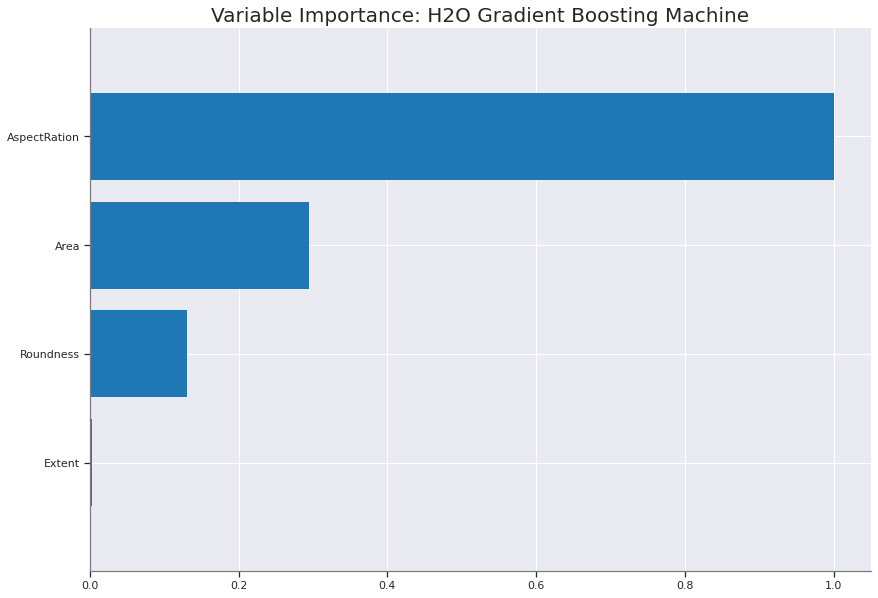

<Figure size 432x288 with 0 Axes>

In [37]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()

26
glm


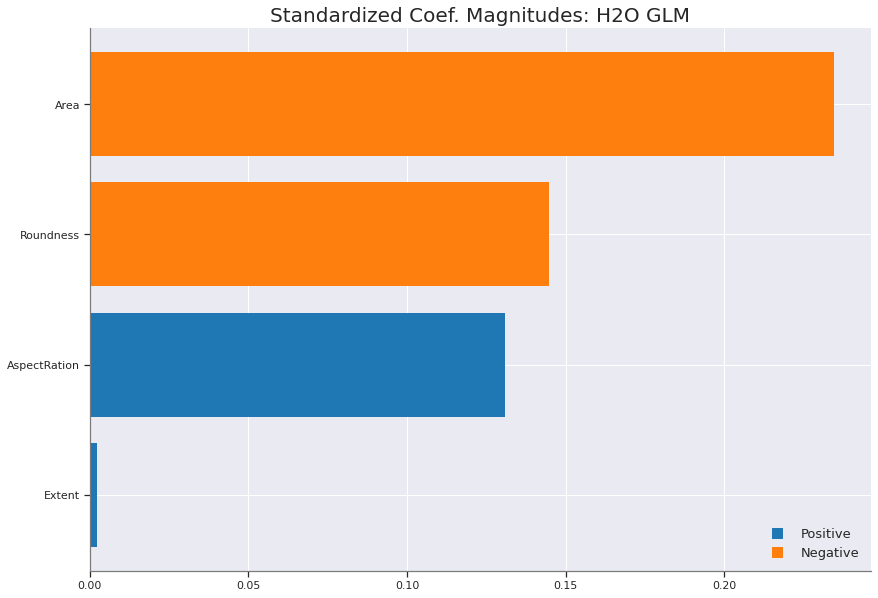

In [38]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(aml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()

In [39]:
print(best_model.rmse(train = True))

0.07968349439481422


In [40]:
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass  
    try:
      d['gini']=perf.gini()
    except:
      pass    
    return d

In [41]:
mod_perf=best_model.model_performance(df_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

{'mse': 0.008706875058014499,
 'null_degrees_of_freedom': None,
 'null_deviance': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'rmse': 0.09331063743225902}

In [42]:
predictions = best_model.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [43]:
y_pred=h2o.as_list(predictions)
y_pred[0:5]

,predict
0,0.982697
1,0.980565
2,1.000234
3,0.987439
4,0.989119


In [44]:
y_test=h2o.as_list(df_test[y])
y_test[0:5]

,Class
0,1
1,1
2,1
3,1
4,1


# H2O Best Model performance and Variable Importance

In [45]:
print(best_model.cross_validation_metrics_summary)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_1_20220214_32102_model_2


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,67.0,67.0,15640.0,4.0,4.0,4.0,6.0,16.0,13.985075




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.006349459278968389
RMSE: 0.07968349439481422
MAE: 0.016500848430294743
RMSLE: 0.05599409955596102
Mean Residual Deviance: 0.006349459278968389

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.008056048516135382
RMSE: 0.08975549295801
MAE: 0.01883651513504091
RMSLE: 0.06290129852276931
Mean Residual Deviance: 0.008056048516135382

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.018872,0.001328,0.019885,0.017924,0.019200,0.017103,0.020247
1,mean_residual_deviance,0.008059,0.001165,0.009772,0.007487,0.007022,0.007267,0.008745
2,mse,0.008059,0.001165,0.009772,0.007487,0.007022,0.007267,0.008745
3,r2,0.967475,0.004675,0.960655,0.969729,0.971771,0.970555,0.964666
4,residual_deviance,0.008059,0.001165,0.009772,0.007487,0.007022,0.007267,0.008745
5,rmse,0.089588,0.006383,0.098851,0.086526,0.083798,0.085247,0.093516
6,rmsle,0.062797,0.004298,0.068842,0.060218,0.059505,0.059557,0.065860



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-02-14 03:24:01,15.117 sec,0.0,0.497803,0.495616,0.247808
1,,2022-02-14 03:24:01,15.157 sec,5.0,0.308163,0.304344,0.094964
2,,2022-02-14 03:24:01,15.197 sec,10.0,0.196528,0.187167,0.038623
3,,2022-02-14 03:24:01,15.239 sec,15.0,0.136604,0.118033,0.018661
4,,2022-02-14 03:24:01,15.278 sec,20.0,0.106526,0.076447,0.011348
5,,2022-02-14 03:24:01,15.316 sec,25.0,0.092855,0.051428,0.008622
6,,2022-02-14 03:24:01,15.355 sec,30.0,0.086977,0.037012,0.007565
7,,2022-02-14 03:24:01,15.403 sec,35.0,0.084263,0.028104,0.007100
8,,2022-02-14 03:24:01,15.441 sec,40.0,0.082299,0.022645,0.006773
9,,2022-02-14 03:24:01,15.481 sec,45.0,0.081441,0.019694,0.006633



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,AspectRation,12772.312500,1.000000,0.699842
1,Area,3760.722656,0.294443,0.206064
2,Roundness,1676.372437,0.131251,0.091855
3,Extent,40.866051,0.003200,0.002239


<bound method ModelBase.cross_validation_metrics_summary of >


# Important Hyperparameters

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [47]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Testing a range of parameters to find the best values.
https://inria.github.io/scikit-learn-mooc/python_scripts/ensemble_hyperparameters.html

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.ensemble import GradientBoostingClassifier

param_distributions = {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500,700],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
    "learning_rate": loguniform(0.01, 1),
    "max_depth":   np.linspace(1, 32, 32, endpoint=True),
}
search_cv = RandomizedSearchCV(
    GradientBoostingClassifier(), param_distributions=param_distributions,
    scoring="neg_mean_absolute_error", n_iter=20, random_state=0, n_jobs=2
)
search_cv.fit(X_train, y_train)

columns = [f"param_{name}" for name in param_distributions.keys()]
columns += ["mean_test_error", "std_test_error"]
cv_results = pd.DataFrame(search_cv.cv_results_)
cv_results["mean_test_error"] = -cv_results["mean_test_score"]
cv_results["std_test_error"] = cv_results["std_test_score"]
cv_results[columns].sort_values(by="mean_test_error")

,param_n_estimators,param_max_leaf_nodes,param_learning_rate,param_max_depth,mean_test_error,std_test_error
2,500,2,0.195789,5.0,0.010104,0.001826
15,5,20,0.215543,24.0,0.010105,0.001577
1,10,5,0.519866,8.0,0.010311,0.001698
7,10,20,0.088556,18.0,0.010311,0.001426
19,20,2,0.978586,21.0,0.010380,0.002221
4,700,2,0.709894,14.0,0.010517,0.001902
13,500,5,0.05929,5.0,0.010517,0.002191
5,50,20,0.197854,17.0,0.010586,0.002728
16,50,20,0.018107,15.0,0.010723,0.001513
10,5,20,0.088553,31.0,0.011136,0.001242


In [50]:
from matplotlib.legend_handler import HandlerLine2D
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
max_depthss = [1, 32, 32]
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01, 0.8, 0.6, 0.2]
train_results = []
test_results = []
for i in range(len(n_estimators)):
   model = GradientBoostingClassifier(n_estimators = n_estimators[i],learning_rate = learning_rates[i],max_depth = max_depthss[i%3], random_state=0)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

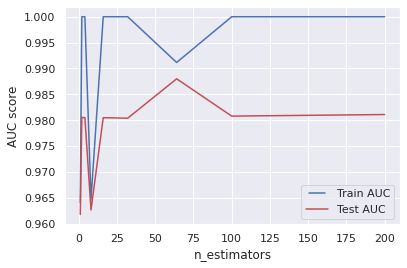

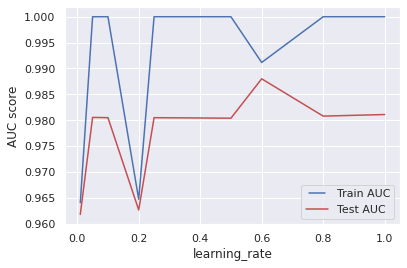

In [51]:
learning_rates.sort()
values = [n_estimators, learning_rates]
for i in values:
    line1, = plt.plot(i, train_results, 'b', label='Train AUC')
    line2, = plt.plot(i, test_results, 'r', label='Test AUC')
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel('AUC score')
    if len(i) ==3:
        plt.xlabel('max_depth')
    else:
        if i[-1] == 200:
            plt.xlabel('n_estimators')
        else:
            plt.xlabel('learning_rate')
    plt.show()

In [52]:
print(train_results," \n",test_results)

[0.9640680606844108, 1.0, 1.0, 0.9647139151137497, 1.0, 1.0, 0.9911614549785065, 1.0, 1.0]  
 [0.9617923423687138, 0.980542159416896, 0.9804916952071502, 0.9626490142556056, 0.9804916952071502, 0.9803907667876588, 0.9880026296274612, 0.9807941755459283, 0.9810966558847063]


# Checking if Regularization is required

In [53]:
df1 = df1[['Area','Extent','Roundness','AspectRation','Class']]
df1.head()

,Area,Extent,Roundness,AspectRation,Class
0,4537,0.657536,0.764510,1.440796,1
1,2872,0.713009,0.831658,1.453137,1
2,3048,0.759153,0.868434,1.465950,1
3,3073,0.783529,0.870203,1.483456,1
4,3693,0.769375,0.874743,1.510000,1


In [54]:
X1 = df1.iloc[:,:-1]
y1 = df1.iloc[:,-1]

# Fitting Ridge regressor on the data

In [55]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring= 'neg_mean_squared_error',cv=5)
ridge_regressor.fit(X1,y1)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [56]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-0.07178856896597352


# Fitting Lasso Regression on the data.

In [57]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring= 'neg_mean_squared_error',cv=5)
lasso_regressor.fit(X1,y1)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.052e+02, tolerance: 3.607e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.852e+02, tolerance: 3.636e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


{'alpha': 0.01}
-0.0693933596863429


In [58]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
gbm = GradientBoostingClassifier(n_estimators = 500, learning_rate=0.195789,max_depth=5.0,max_leaf_nodes=2 )
mse = cross_val_score(gbm,X,y,scoring= 'neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)

print(mean_mse)

-0.19873522133626614


Thus the result returned by Lasso regressor is best and regularization is required.

# Performance Evaluation of the model
We are using classification report to evaluate the performance of the model.
It returns the following values:

**Precision** - Precision is defined as the ratio of true positives to the sum of true and false positives.

**Recall** - Recall is defined as the ratio of true positives to the sum of true positives and false negatives.

**F1-score** - The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.

**Support** - Support is the number of actual occurrences of the class in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process.




In [63]:
from sklearn.metrics import classification_report
gbm.fit(X_train,y_train)

print(classification_report(y_test,gbm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1653
           1       0.99      0.99      0.99      1984

    accuracy                           0.99      3637
   macro avg       0.99      0.99      0.99      3637
weighted avg       0.99      0.99      0.99      3637



Copyright (c) 2021 Saswato Bhattacharyya

 

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

 

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

 

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.